# Hypothesis Tests Practices

This Jupyter notebook has some brief practices on hypothesis testing. I've included some examples of this concept using python. Hypothesis testing is a statistical method used in making statistical decisions using experimental data. Hypothesis testing is an assumption we make about a population parameter, and some statistical approach is needed to prove it. Some mathematical conclusion is necessary, whatever is supposed to be true.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
#This dataset is a sample of the medical records of 299 patients (more than 30 samples) who had heart failure, collected 
#during their follow-up period, where each patient profile has 13 clinical features.
#https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records
clinical = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
clinical.shape

(299, 13)

In [4]:
platelets=clinical.loc[:,'platelets']

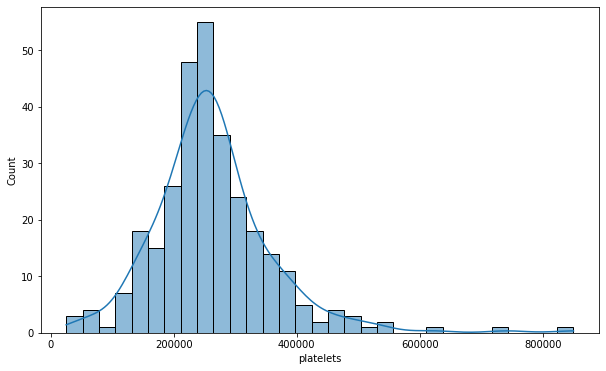

In [5]:
#Following it is the dataset distribution of the Platelets attribute.
#The Platelets have a normal distribution, even though it is not a necessary condition for hypothesis testing with more than 30 
#samples.
plt.figure(figsize=(10,6))

sns.histplot(data=platelets, kde=True)

plt.show()

Following, the One Sample z Test (more than 30 samples) determines whether the sample mean is statistically different from a known or hypothesised population mean.

## H0:- the mean level of blood Platelets is normal.
## H1:- the mean level of blood Platelets is not normal.

In [6]:
ztest, pval = stests.ztest(platelets, x2=None, value=260000)

print("the p-Value is {:0.2f}".format(float(pval)))

if pval<0.05:
    print("Reject null hypothesis.")
else:
    print("Do not reject null hypothesis.")

the p-Value is 0.55
Do not reject null hypothesis.


A normal platelet count ranges from 150,000 to 450,000 kiloplatelets per milliliter of blood. The individual has thrombocytosis, in the case of more than 450,000 platelets. The individual has thrombocytopenia in the case of less than 150,000. Therefore, since this p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. In other words, the mean level of blood Platelets is normal for the dataset sample (around 260,000 kiloplatelets per milliliter).

In [7]:
womenPlatelets=clinical.loc[clinical['sex']==0,'platelets']

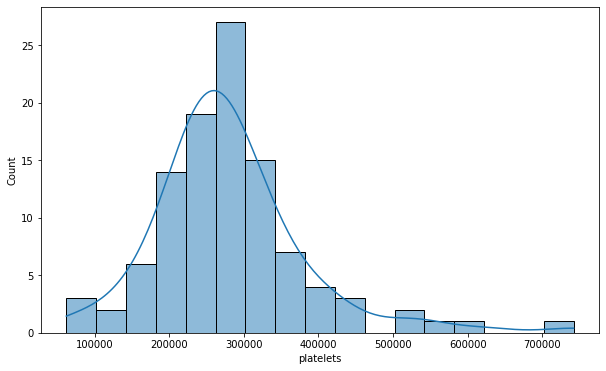

In [8]:
#Following it is the dataset distribution of the Platelets attribute for women.
plt.figure(figsize=(10,6))

sns.histplot(data=womenPlatelets, kde=True)

plt.show()

In [9]:
menPlatelets=clinical.loc[clinical['sex']==1,'platelets']

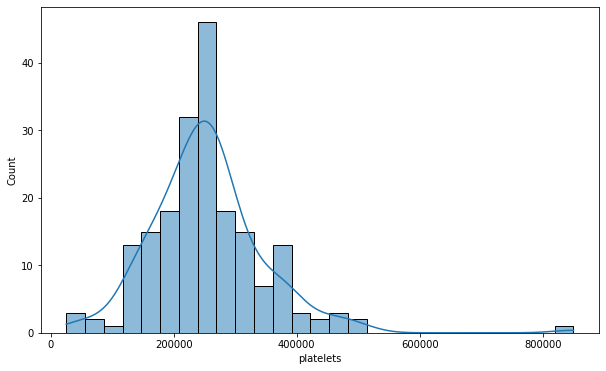

In [10]:
#Following it is the dataset distribution of the Platelets attribute for men.
plt.figure(figsize=(10,6))

sns.histplot(data=menPlatelets, kde=True)

plt.show()

The Independent Samples z Test or 2-sample z-test compares the means of two independent groups to determine whether there is statistical evidence that the associated population means are significantly different. The following z-test compares if the level of platelets is significantly different between women and men.

## H0:- the mean level of Platelets is not significantly different between women and men.
## H1:- the mean level of Platelets is significantly different between the women and men.

In [11]:
ztest, pval = stests.ztest(womenPlatelets, x2=menPlatelets, value=0, alternative='two-sided')

print("the p-Value is {:0.2f}".format(float(pval)))

if pval<0.05:
    print("Reject null hypothesis.")
else:
    print("Do not reject null hypothesis.")

the p-Value is 0.03
Reject null hypothesis.


Since p-value is less than 0.05, we have evidence to reject the null hypothesis. In other words, the mean level of Platelets is significantly different between the women and men.

In [12]:
smokingPlatelets=clinical.loc[clinical['smoking']==0,'platelets']

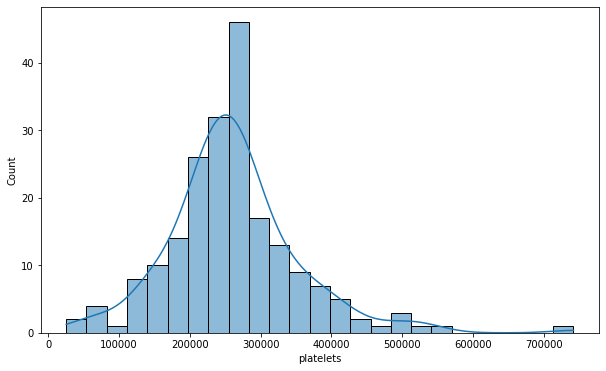

In [13]:
#Following it is the dataset distribution of the Platelets attribute for smokers.
plt.figure(figsize=(10,6))

sns.histplot(data=smokingPlatelets, kde=True)

plt.show()

In [14]:
nonSmokingPlatelets=clinical.loc[clinical['smoking']==1,'platelets']

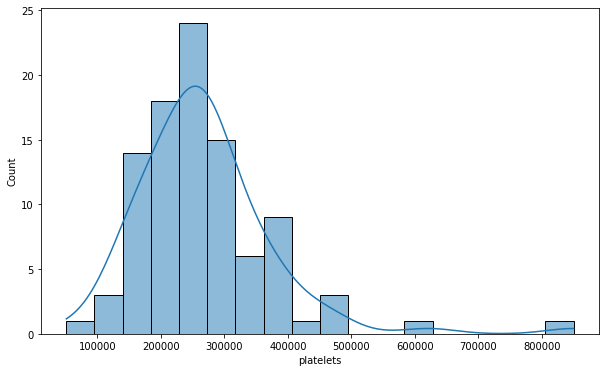

In [15]:
#Following it is the dataset distribution of the Platelets attribute for non smokers.
plt.figure(figsize=(10,6))

sns.histplot(data=nonSmokingPlatelets, kde=True)

plt.show()

The following z-test compares if the level of platelets is significantly different between smokers and non-smokers.

## H0:- the mean level of Platelets is not significantly different between the smokers and non-smokers.
## H1:- the mean level of Platelets is significantly different between the smokers and non-smokers.

In [16]:
ztest, pval = stests.ztest(nonSmokingPlatelets, x2=smokingPlatelets, value=0, alternative='two-sided')

print("the p-Value is {:0.2f}".format(float(pval)))

if pval<0.05:
    print("Reject null hypothesis.")
else:
    print("Do not reject null hypothesis.")

the p-Value is 0.63
Do not reject null hypothesis.


Since p-value is greater than 0.05, we don't have evidence to reject the null hypothesis. In other words, the mean level of Platelets is not significantly different between the smokers and non-smokers.

In [17]:
serumSodium=clinical.loc[:,'serum_sodium']

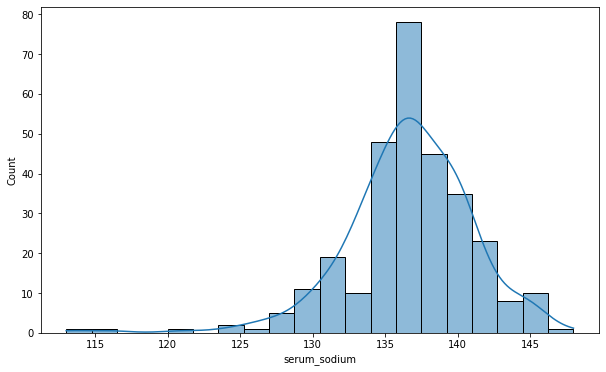

In [18]:
#Following it is the dataset distribution of the Serum Sodium attribute.
#The Serum Sodium has a normal distribution, even though it is not a necessary condition for hypothesis testing with more 
#than 30 samples.
plt.figure(figsize=(10,6))

sns.histplot(data=serumSodium, kde=True)

plt.show()

Following, the One Sample z Test (more than 30 samples) determines whether the sample mean is statistically different from a known or hypothesised population mean.

## H0:- the mean level of Serum Sodium is normal.
## H1:- the mean level of Serum Sodium is not normal.

In [19]:
ztest, pval = stests.ztest(serumSodium, x2=None, value=136.63)

print("the p-Value is {:0.2f}".format(float(pval)))

if pval<0.05:
    print("Reject null hypothesis.")
else:
    print("Do not reject null hypothesis.")

the p-Value is 0.99
Do not reject null hypothesis.


A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). 
Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L. 
Many possible conditions and lifestyle factors can lead to hyponatremia.
Since p-value is greater than 0.05, we don't have evidence to reject the null hypothesis. In other words, the mean blood sodium level is normal for the dataset sample (136.63 mEq/L).

In [20]:
nonSmokingSerumSodium=clinical.loc[clinical['smoking']==1,'serum_sodium']

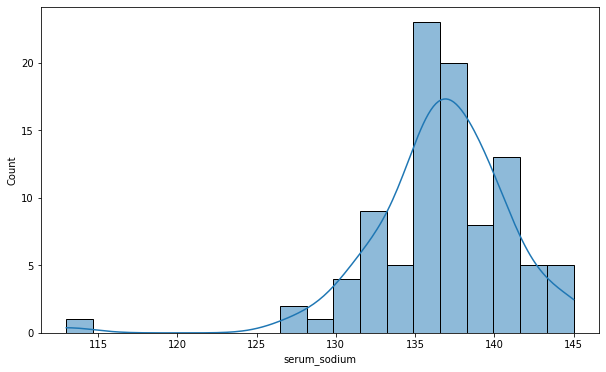

In [21]:
#Following it is the dataset distribution of the Serum Sodium attribute for non-smokers.
plt.figure(figsize=(10,6))

sns.histplot(data=nonSmokingSerumSodium, kde=True)

plt.show()

In [22]:
smokingSerumSodium=clinical.loc[clinical['smoking']==0,'serum_sodium']

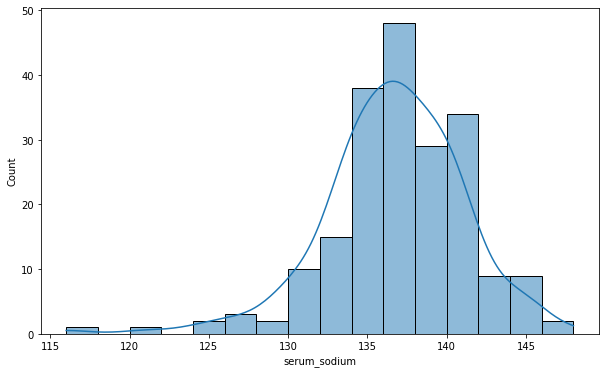

In [23]:
#Following it is the dataset distribution of the Serum Sodium attribute for smokers.
plt.figure(figsize=(10,6))

sns.histplot(data=smokingSerumSodium, kde=True)

plt.show()

The following z-test compares if the level of Serum Spdium is significantly different between smokers and non-smokers.

## H0:- the mean level of Serum Sodium is not significantly different between the smokers and non-smokers.
## H1:- the mean level of Serum Sodium is significantly different between the smokers and non-smokers.

In [24]:
ztest, pval = stests.ztest(nonSmokingSerumSodium, x2=smokingSerumSodium, value=0, alternative='two-sided')

print("the p-Value is {:0.2f}".format(float(pval)))

if pval<0.05:
    print("Reject null hypothesis.")
else:
    print("Do not reject null hypothesis.")

the p-Value is 0.93
Do not reject null hypothesis.


Since p-value is greater than 0.05, we don't have evidence to reject the null hypothesis. In other words, the mean level of Serum Sodium is not significantly different between the smokers and non-smokers.
